# Réduction des matrices et des endomorphismes

## Exercice

Soit $M$ la matrice définie par
$$M=\left[\begin{matrix}2 a - 1 & a + b - 1 & - a + b + 1 & 2 b\\- a - 2 b + 1 & 1 - b & a + b - 1 & 0\\a - b - 1 & a + b - 1 & 2 b + 1 & 3 b\\b & 0 & - b & a - b\end{matrix}\right]$$
où $a$ et $b$ sont deux réels.
1. Déterminer les valeurs propres et les espaces propres de $M$ suivant les valeurs de $a$ et $b$.
1. Comparer avec le résultat de la commande `M.eigenvects()` 

In [1]:
import sympy as sp
sp.init_printing()

In [2]:
a, b = sp.symbols('a b', real=True)

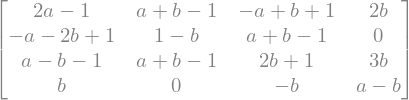

In [3]:
M = sp.Matrix([[2*a-1, a+b-1, -a+b+1, 2*b], [-a-2*b+1, 1-b, a +
              b-1, 0], [a-b-1, a+b-1, 2*b+1, 3*b], [b, 0, -b, a-b]])
M

**Question 1**

On commence par créer un pivot en s'appuyant sur un des 1 de la première colonne. De plus, on ne travaille que sur les lignes pour pouvoir calculer les espaces propres.
<div class="alert alert-info"> Il faut éviter le plus possible de discuter sur des valeurs peut-être inutiles. </div>

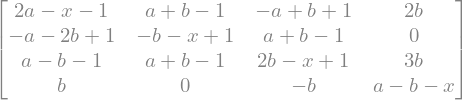

In [4]:
x = sp.symbols('x', real=True)
M-x*sp.eye(4)

On va utiliser un des 1, pour faire apparaître un *bon* pivot.

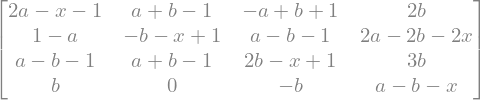

In [5]:
_.elementary_row_op('n->n+km', 1, 2, 3)

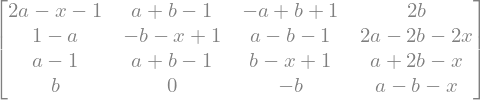

In [6]:
_.elementary_row_op('n->n+km', 2, 1, 3)

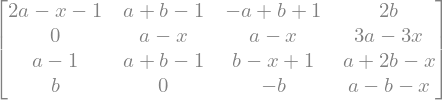

In [7]:
_.elementary_row_op('n->n+km', 1, 1, 2)

On voit que la deuxième ligne s'annule pour $x=a$, $a$ est donc une valeur propre.

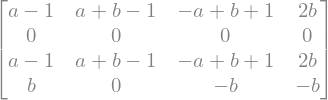

In [8]:
M0 = _
M0.subs({x: a})

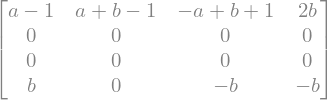

In [9]:
_.elementary_row_op('n->n+km', 2, -1, 0)

On a donc deux cas
1. si $b=0$, le rang vaut 1 si $a\ne1$ et 0 si $a=1$
1. si $b\ne 0$, le rang vaut 2

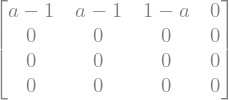

In [10]:
M1 = _
M1.subs({b: 0})

1. Si $b=0$ et $a=1$, c'est l'identité. 
1. Si $b=0$ et $a\ne 1$, $E_M(a)$ a pour équation dans $\mathbb{C}^4$
$$x+y-z=0$$
c'est un hyperplan de base (par exemple)
$$(1, -1, 0, 0),\quad (1, 0,1,0),\quad (0,0,0,1)$$

In [11]:
# Cas où b est différent de 0
alpha, beta, gamma, delta = sp.symbols(
    '\\alpha \\beta \\gamma \\delta', real=True)
X = sp.Matrix([alpha, beta, gamma, delta])

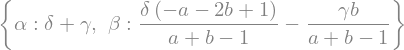

In [12]:
sp.solve(M1@X, X)

Si $a+b\ne1$, on trouve l'espace propre de dimension 2
$$E_M(a)=\mathrm{Vect}\left(\left\{\begin{bmatrix} a+b-1\\ -b\\ a+b-1\\ 0\end{bmatrix},\begin{bmatrix} a+b-1\\ 1-a-2\,b\\ 0\\ a+b-1\end{bmatrix}\right\}\right)$$

Pour le cas $b=1-a$ (et comme $b\ne 0$, on a $a\ne 1$), on trouve

In [13]:
sp.solve(M1.subs({b: 1-a})@X, X)

On trouve alors l'espace propre de dimension 2
$$E_M(a)=\mathrm{Vect}\left(\left\{\begin{bmatrix} 0\\ 1\\ 0\\ 0\end{bmatrix},\begin{bmatrix} 0\\ 0\\ 1\\ -1\end{bmatrix}\right\}\right)$$

*On suppose maintenant que $x\ne a$, on peut alors simplifier la matrice $M_0$*

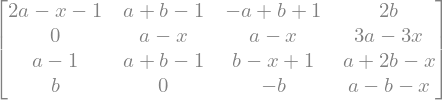

In [14]:
M0

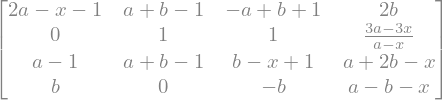

In [15]:
_.elementary_row_op('n->kn', 1, 1/(a-x))

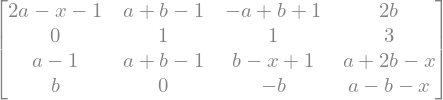

In [16]:
_.applyfunc(sp.simplify)

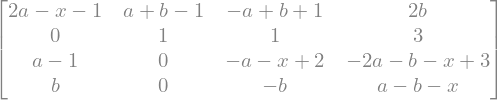

In [17]:
_.elementary_row_op('n->n+km', 2, 1-a-b, 1)

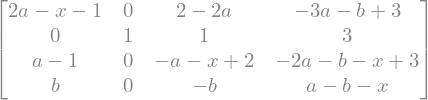

In [18]:
_.elementary_row_op('n->n+km', 0, 1-a-b, 1)

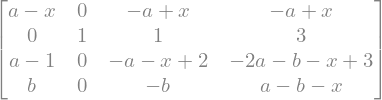

In [19]:
_.elementary_row_op('n->n+km', 0, -1, 2)

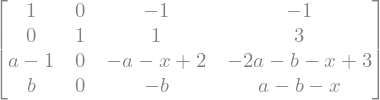

In [20]:
# On peut simplifier par a-x la première ligne, car on sait que a est différent de x
(_.elementary_row_op('n->kn', 0, 1/(a-x))).applyfunc(sp.simplify)

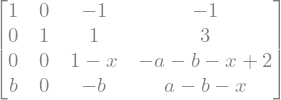

In [21]:
_.elementary_row_op('n->n+km', 2, 1-a, 0)

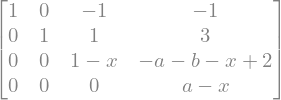

In [22]:
_.elementary_row_op('n->n+km', 3, -b, 0)

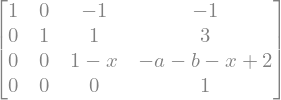

In [23]:
_.elementary_row_op('n->kn', 3, 1/(a-x)).applyfunc(sp.simplify)

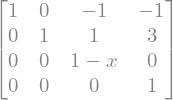

In [24]:
_.elementary_row_op('n->n+km', 2, a+b+x-2, 3)

On trouve que $x=1$ est une autre valeur propre

In [25]:
sp.solve(_.subs({x: 1})@X, X)

Et l'espace propre associé est de dimension 1 et c'est
$$E_M(1)=\mathrm{Vect}\left(\left\{\begin{bmatrix} 1\\ -1\\ 1\\ 0\end{bmatrix}\right\}\right)$$

**Question 2**

Si on ne fait pas attention, la fonction `.eigenvects` nous trompe.

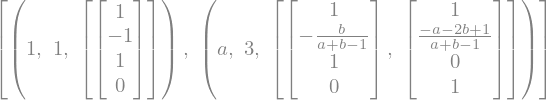

In [26]:
M.eigenvects()

On a donc un problème si $a+b=1$ et un cas particulier si $a=1$.

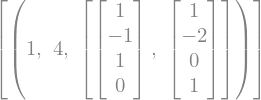

In [27]:
# Cas a=1
M.subs({a: 1}).eigenvects()

<div class="alert alert-danger"> Ce résultat est faux !

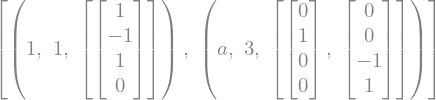

In [28]:
# Cas b=1-a
M.subs({b: 1-a}).eigenvects()

## Exercice

On s'intéresse au problème suivant. Soit $A\in\mathrm{M}_n\left(\mathbb{C}\right)$, on définit alors la matrice $M$ par blocs de la manière suivante
$$M=\left[\begin{array}{c|c} 0_n& I_n\\ \hline 2.A& A\end{array}\right]\in\mathrm{M}_n\left(\mathbb{C}\right)$$
L'objectif de cet exercice est de trouver des conditions nécessaires pour que $M$ soit *diagonalisable*, c'est-à-dire que
$$\mathrm{M}_{n,1}\left(\mathbb{R}\right)=\bigoplus_{\lambda\in\mathrm{Sp}(M)} E_M(\lambda)$$
1. Étudier le cas $n=1$, où $A=[a]$ avec $a\in\mathbb{C}$.
1. Étudier le cas $n=2$, où
$$A=\begin{bmatrix} a&b\\ c&d\end{bmatrix}$$
1. Faire le cas général.

**Question 1**

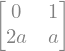

In [29]:
a = sp.symbols('a')  # Car a n'est plus réel
M = sp.Matrix([[0, 1], [2*a, a]])
M

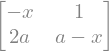

In [30]:
M-x*sp.eye(2)

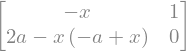

In [31]:
_.elementary_row_op('n->n+km', 1, x-a, 0)

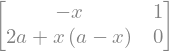

In [32]:
_.applyfunc(sp.simplify)

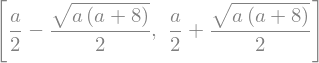

In [33]:
sp.solve(_[1, 0], x)

Dans $\mathbb{C}$, on aura donc deux cas
1. $a\notin \{0,-8\}$ et la matrice aura deux valeurs propres distinctes $(\lambda_1,\lambda_2)$ et donc sera diagonalisable car la somme des dimensions fait 2.
1. $a\in\{0,-8\}$, on aura qu'une seule valeur propre et l'espace propre sera de dimension 1, la matrice ne sera pas diagonalisable.

On pouvait aussi le voir avec le polynôme caractéristique.

In [34]:
(M-x*sp.eye(2)).det()

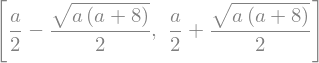

In [35]:
sp.solve(_, x)

Et remarquer que pour ces valeurs, l'espace propre est de dimension toujours 1, même quand la racine est double !

**Question 2**

In [36]:
b, c, d = sp.symbols('b c d')

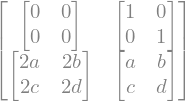

In [37]:
A = sp.Matrix([[a, b], [c, d]])
M = sp.BlockMatrix([[sp.zeros(2), sp.eye(2)], [2*A, A]])
M

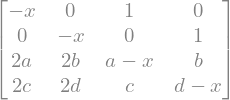

In [38]:
M = sp.Matrix(M)
M-x*sp.eye(4)

In [39]:
_.det().factor()

*Et on continue longtemps sans rien trouver...*

**Question 3**

On va montrer l'équivalence
$$\boxed{\boxed{\left[M\text{ diagonalisable}\right]\iff\left[A\text{ diagonalisable et } \mathrm{Sp}(M)\cap\{0,-8\}=\emptyset\right]}}$$

Calculons pour $\lambda\in\mathbb{C}$ 
$$\mathrm{rang}\left(M-\lambda.I_{2\,n}\right)=\mathrm{rang}\left(\left[\begin{array}{c|c} -\lambda.I_n& I_n\\ \hline 2.A&A-\lambda.I_n \end{array}\right]\right)$$
En effectuant une transvection-bloc sur les lignes (multiplication *à gauche* !), $L_2\leftarrow L_2-(A-\lambda.I_n)\,L_1$, on obtient
$$\mathrm{rang}\left(M-\lambda.I_{2\,n}\right)=\mathrm{rang}\left(\left[\begin{array}{c|c}-\lambda.I_n&I_n \\ \hline (2+\lambda).A-\lambda^2.I_n&O_n \end{array}\right]\right)=n+\mathrm{rang}\left((2+\lambda).A-\lambda^2.I_n\right)$$
et finalement, pour $\lambda\ne -2$
$$\dim\left(E_M(\lambda)\right)=\dim\left(E_A\left(\frac{\lambda^2}{2+\lambda}\right)\right)$$

Étudions l'application
$$\psi\;:\left\{\begin{array}{ccc} \mathbb{C}\setminus\{-2\}&\longrightarrow&\mathbb{C}\\ \lambda&\longmapsto&\displaystyle \frac{\lambda^2}{2+\lambda}\end{array}\right.$$

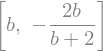

In [40]:
sp.solve(sp.Eq(a**2/(2+a),b**2/(2+b)), a)

In [41]:
# Il y a en général deux valeurs, sauf quand 
sp.solve(sp.Eq(_[0], _[1]), b)

In [42]:
# Ce qui correspond aux valeurs de lambda^2/(2+lambda)
(_[0]**2/(2+_[0]), (_[1]**2/(2+_[1])))

($\Leftarrow$) Soit $(\alpha_1,\ldots,\alpha_p)$ les valeurs propres distinctes de $A$, alors, comme $A$ est diagonalisable, on a
$$\sum_{k=1}^p \dim\left(E_A(\alpha_k)\right)=n$$
D'après l'étude de la fonction $\psi$, comme les valeurs propres sont différentes de 0 et -8, on a l'existence pour tout $k\in\{1,\ldots,p\}$ de deux complexes $\lambda_{1,k}$ et $\lambda_{2,k}$ tels que
$$\forall k\in\{1,\ldots,p\},\; \psi\left(\lambda_{1,k}\right)=\psi\left(\lambda_{2,k}\right)=\alpha_k$$
et alors
$$\mathrm{Sp}(M)=\left\{\lambda_{1,k},\; k\in\{1,\ldots,p\}\right\}\cup\left\{\lambda_{2,k},\; k\in\{1,\ldots,p\}\right\}$$
et
$$\sum_{\lambda\in\mathrm{Sp}(M)}\dim\left(E_M(\lambda)\right)=2\,\sum_{k=1}^p \dim\left(E_A(\alpha_k)\right)=2\,n$$
ce qui montre que $M$ est diagonalisable.

($\Rightarrow$) Par contraposition.
1. Si $A$ n'est pas diagonalisable, alors
$$\sum_{k=1}^p \dim\left(E_A(\alpha_k)\right)<n$$
et, comme on a au plus deux valeurs propres correspondantes pour $M$
$$\sum_{\lambda\in\mathrm{Sp}(M)} \dim\left(E_M(\lambda)\right)\le 2\,\sum_{k=1}^p \dim\left(E_A(\alpha_k)\right)<2\,n$$
donc $M$ n'est pas diagonalisable.
1. De même, si $A$ est diagonalisable et 0 (ou -8) est dans le spectre de $A$, la somme des dimensions des espaces propres de $M$ n'atteindra pas $2\,n$.